Contact: fkutschera@ucsd.edu

In this example, we will use a down-scaled version of "The Tsunami Problem Version" and explore a so-called fully coupled, 3D earthquake-tsunami simulation to learn more about the underlying dynamics which govern tsunami generation.

# 3D fully coupled earthquake dynamic rupture and tsunami benchmarks

The two joint CRESCENT & SCEC/USGS benchmark problems TTPV1 and TTPV2 extend the SCEC/USGS dynamic rupture benchmark “The Problem Version 36” (TPV36, https://strike.scec.org/cvws/download/TPV36_37_Description_v12.pdf; last access May 12, 2025), a 3D shallowly dipping thrust faulting dynamic rupture problem, which includes **surface rupture**. “The Tsunami Problem Version 1” (TTPV1) and “The Tsunami Problem Version 2” (TTPV2) use the **same fault geometry, nucleation mechanism, governing friction law, material properties, and initial stress conditions**. The **differences are an added water layer** and, in TTPV2, varying seafloor bathymetry, to model fully coupled earthquake and tsunami generation dynamics. Both simulations also include acoustic wave propagation within the ocean.

The full description of the fully coupled earthquake-tsunami benchmarks can be found here: https://doi.org/10.5281/zenodo.15389414

## Table of Contents

- [Model geometry](#Model-geometry)
- [Mesh](#Mesh)
- [Run a benchmark using the SeisSol App in the Quakeworx Gateway](#Run-a-benchmark-using-the-SeisSol-App-in-the-Quakeworx-Gateway)
- [Visualization](#Visualization)
  - [Fault output](#Fault-output)
  - [Surface output](#Surface-output)
      - [Short tasks](#Short-tasks)
- [Exercises (optional)](#Exercises-(optional))
  - [Task 1](#Task-1)
  - [Task 2](#Task-2)
  - [Task 3](#Task-3)
  - [Task 4](#Task-4)
  

## Model geometry 

In TTPV1 and TTPV2, the fault plane is embedded within a homogeneous elastic medium (i.e., Earth) and dips at 15 degrees towards the East (in positive x-direction).

The rectangular fault is a planar thrust fault, measuring 30 km along-strike and 28 km down-dip. The fault reaches the seafloor. The fault trace is located at $x=0$ and at depth $z=0$ for TTPV1 and TTPV2. We choose a coordinate system with the fault dipping 15 degrees in positive x-direction (landward). Thus, the fault plane's spatial coordinates are:

\begin{align*}
    &x = |z|/\left(\tan 15^{\circ}\right) \\
    -15~\text{km} \le &y \le 15~\text{km} \\
    -(28~\text{km})\cdot(\sin 15^{\circ}) \le &z \le -0~\text{km}
\end{align*}

The hypocenter is located in the center of the fault along-strike (at $y=0$), and $18000$ m down-dip. The exact hypocenter coordinates ($x,y,z$) are ($17387.0$ m, $0.0$ m, $-4658.0$ m).

The figure below shows the geometry of TTPV1. Here, a uniform water layer is added atop the
elastic medium with a thickness of 1 km. The sea surface is at z = 1000 m and the
seafloor is at a constant depth of z = 0 m.



![Figure01](figures/Figure01.png)

For TTPV2, the sea surface level is constant at $z=3000$ m. However, the underlying model geometry is more complex. While the fault geometry and fault coordinates remain the same, the bathymetry in this benchmark problem is variable. Seaward of the ``trench'' (the fault trace), a uniform water depth of 3 km atop the Earth is assumed. To the East of the trench, the seafloor slopes to approximately 50 m.

![Figure02](figures/Figure02.png)

## Mesh 

SeisSol uses unstructured tetrahedral meshes to incorporate complex 3D bathymetry and topography and the complex fault geometries. We provide two down-scaled meshes for this training. A very small 18k mesh for TTPV1 with limited horizontal extent, and a 225k mesh for TTPV2. We recommend to **start with TTPV1**.

## Run a benchmark using the SeisSol App in the Quakeworx Gateway

Now we run SeisSol using the files provided in the [Quakework earthquake-tsunami GitHub Training directory](https://github.com/SeisSol/Training/tree/main/quakeworx). 
SeisSol is one of the curated Apps in Quakeworx and can be found here: https://qwx1.2.onescienceway.com/app/qwx1expansecyounseissol2

Make sure to log in, navigate to the SeisSol App, and select the "SeisSol earthquake-tsunami" App type after launch. **Upload all the required files and submit the job now.** While SeisSol is running, you might want to checkout the [documentation](https://seissol.readthedocs.io/en/latest/parameter-file.html) of the input files.

![Launch](figures/launch.png)

## Visualization

There exist multiple ways of visualizing the SeisSol output. One option is to download all output files from the Quakeworx homepage and use [ParaView](https://www.paraview.org/) for vizualization locally. However, here we show a simpler way of quick visualization of the results. It also comes with fewer non-standard python3 dependencies, which we prepare below.

In [ ]:
!pip install seissolxdmf
import sys
sys.path.append("/home/qwxdev/.local/lib/python3.12/site-packages")

In [48]:
import numpy as np
from matplotlib import pyplot as plt

import seissolxdmf as seisx
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors

**Please use your job name here.**

In [49]:
# Asssuming you job name was "SeisSol_TTPV1"
job_name = "SeisSol_TTPV1"

In [50]:
benchmark = "ttpv1" # we start with "ttpv1"; for those who run the second benchmark use "ttpv2"

#### Fault output

We first visualize what we call the **[fault output](https://seissol.readthedocs.io/en/latest/fault-output.html)** generated by SeisSol. We can visualize all processes occurring across the fault surface during dynamic rupture, e.g. slip rates, slip, shear and normal stresses, effective friction, etc.

Feel free to explore all of these field, which are documented [here](https://seissol.readthedocs.io/en/latest/fault-output.html#outputmask). For now, we focus on the accumulated fault slip ("ASl"). 

In [51]:
# Load data
xdmfFilename = "../../../{}/outputs/{}-fault.xdmf".format(job_name,benchmark)
# If run locally, give the absolut path
#xdmfFilename = "/Users/fkutschera/Documents/PhD/Quakeworx/simulations/SeisSol_ttpv1_branch_test_1/outputs/ttpv1-fault.xdmf"

In [88]:
def plot_fault(xdmfFilename, ndt=None, var="ASl", vmin=None, vmax=None, cmap="magma_r"):
    """
    Visualize a SeisSol fault field (e.g., ASl, SRd, Vr, etc.) on the fault mesh.

    Parameters
    ----------
    xdmfFilename : str
        Path to the fault output .xdmf file.
    ndt : int or None, optional
        Output timestep. If None, selects last timestep automatically.
    var : str, optional
        Fault field to visualize (default: "ASl").
    vmin, vmax : float or None, optional
        Color scale limits. If None, use data min/max.
    cmap : str
        Matplotlib colormap name (e.g., "magma_r", "viridis", "Oranges").
    """

    # --- Load SeisSol fault output ---
    sx = seisx.seissolxdmf(xdmfFilename)
    if ndt is None:
        ndt = sx.ReadNdt() - 1  # last timestep

    xyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    field = sx.ReadData(var, ndt)

    # --- Colormap limits ---
    if vmin is None:
        vmin = np.min(field)
    if vmax is None:
        vmax = np.max(field)

    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # --- Triangular faces ---
    verts = [xyz[connect[i]] for i in range(connect.shape[0])]

    # Use user-specified colormap
    colormap = plt.get_cmap(cmap)
    face_colors = [colormap(norm(field[i])) for i in range(len(verts))]

    # --- Plotting ---
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")

    coll = Poly3DCollection(verts, facecolors=face_colors, alpha=1.0)
    ax.add_collection3d(coll)

    # Axis limits
    ax.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
    ax.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
    ax.set_zlim(np.min(xyz[:, 2]), np.max(xyz[:, 2]))

    ax.set_xlabel("x", labelpad=20, fontsize=12)
    ax.set_ylabel("y", labelpad=15, fontsize=12)
    ax.set_zlabel("z", labelpad=10, fontsize=12)

    # --- Ticks ---
    x_ticks = np.linspace(np.min(xyz[:, 0]), np.max(xyz[:, 0]), 3)
    y_ticks = np.linspace(np.min(xyz[:, 1]), np.max(xyz[:, 1]), 3)
    z_ticks = np.linspace(np.min(xyz[:, 2]), np.max(xyz[:, 2]), 3)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_zticks(z_ticks)

    ax.set_xticklabels([f"{t/1000:.0f} km" for t in x_ticks], rotation=30)
    ax.set_yticklabels([f"{t/1000:.0f} km" for t in y_ticks], rotation=30)
    ax.set_zticklabels([f"{t/1000:.0f} km" for t in z_ticks], rotation=0)

    # Increase spacing to avoid overlap
    ax.tick_params(pad=10)

    # --- Colorbar ---
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    cbar = plt.colorbar(sm, ax=ax, shrink=0.65, aspect=12, pad=0.15)
    if var == "ASl":
        cbar.set_label(f"Fault slip [m]")
    else:
        cbar.set_label(f"{var} [units]")

    # --- View angle ---
    ax.view_init(elev=5, azim=-50)

    plt.show()

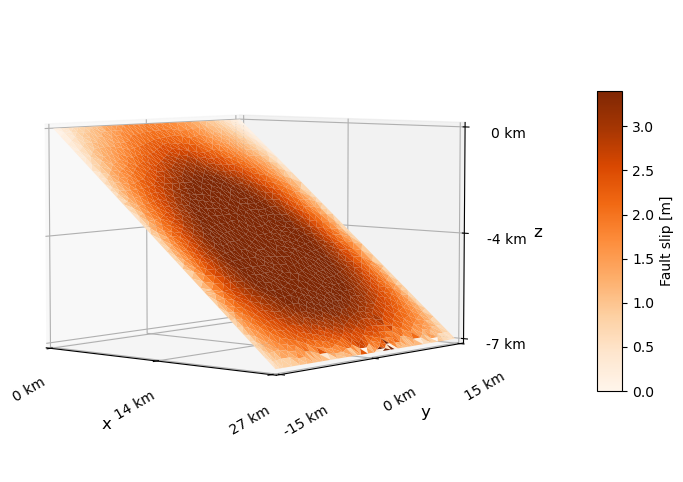

In [89]:
plot_fault(xdmfFilename, vmin=0, vmax=3.4, cmap="Oranges")

#### Surface output

Next we visualize what we call the **[surface output](https://seissol.readthedocs.io/en/latest/free-surface-output.html)** generated by SeisSol. Fields _v1, v2, v3_ are the particle velocities and _u1, u2, u3_ are the displacements in _x, y, z_ direction, respectively, evaluated everywhere at the surfaces.

SeisSol stores the data for the elastic seafloor (Earth) with a different identifier ("locationFlag") compared to the acoustic seafloor as well as the acoustic sea surface. Here, the writer outputs the "locationFlag", which has the values 0 and 1 when at the elastic or acoustic side of an elastic-acoustic interface. In this way, we can distinguish between both sides of the interface even though they have the same coordinates. It has the value 2 for an ordinary free surface boundary condition and the value 3 for a free surface with gravity boundary condition.

In [32]:
# Load data
xdmfFilename = "../../../{}/outputs/{}-surface.xdmf".format(job_name,benchmark)
# If run locally, give the absolut path
#xdmfFilename = "/Users/fkutschera/Documents/PhD/Quakeworx/simulations/SeisSol_ttpv1_branch_test_1/outputs/ttpv1-surface.xdmf"

In [44]:
def plot_surface(xdmfFilename, timestep, var="u3", select_flag=3, vmin=None,vmax=None):
    """
    Plot a SeisSol surface variable filtered by locationFlag.

    Parameters
    ----------
    xdmfFilename : str
        Path to the surface .xdmf file.
    timestep : int
        Time step to read.
    var : str, optional
        Name of variable to plot (default "u3").
    select_flag : int, optional
        Location flag to filter:
            0 = elastic seafloor
            1 = acoustic seafloor
            2 = free surface
            3 = free surface with gravity (default)
    vmin, vmax : float, optional
        Color limits. If None, use data min/max.
    """

    # --- Read mesh and data ---
    sx = seisx.seissolxdmf(xdmfFilename)

    xyz = sx.ReadGeometry()          # (nNodes, 3)
    connect = sx.ReadConnect()       # (nTriangles, 3)
    locationFlag = sx.ReadData("locationFlag", 0)  # always time-independent

    # Read chosen variable
    U = sx.ReadData(var, timestep)

    # --- Filter triangles by locationFlag ---
    mask = (locationFlag == select_flag)
    connect_f = connect[mask]
    U_f = U[mask]

    if connect_f.shape[0] == 0:
        raise ValueError(f"No triangles found for locationFlag={select_flag}")

    # --- Prepare plotting coordinates ---
    x = xyz[:, 0]
    y = xyz[:, 1]

    # --- Color range ---
    vmin = np.min(U_f) if vmin is None else vmin
    vmax = np.max(U_f) if vmax is None else vmax

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(8, 7))

    tpc = ax.tripcolor(x, y, connect_f, facecolors=U_f, cmap="seismic", rasterized=True, vmin=vmin, vmax=vmax)

    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")

    # Preserve aspect ratio
    ax.set_aspect("equal", adjustable="box")

    # Colorbar
    cbar = plt.colorbar(tpc, ax=ax, orientation="vertical", pad=0.08, shrink=0.6)
    if "u" in var:
        cbar.set_label(f"{var} [m]")
    else:
        cbar.set_label(f"{var} [m/s]")

    plt.tight_layout()
    plt.show()

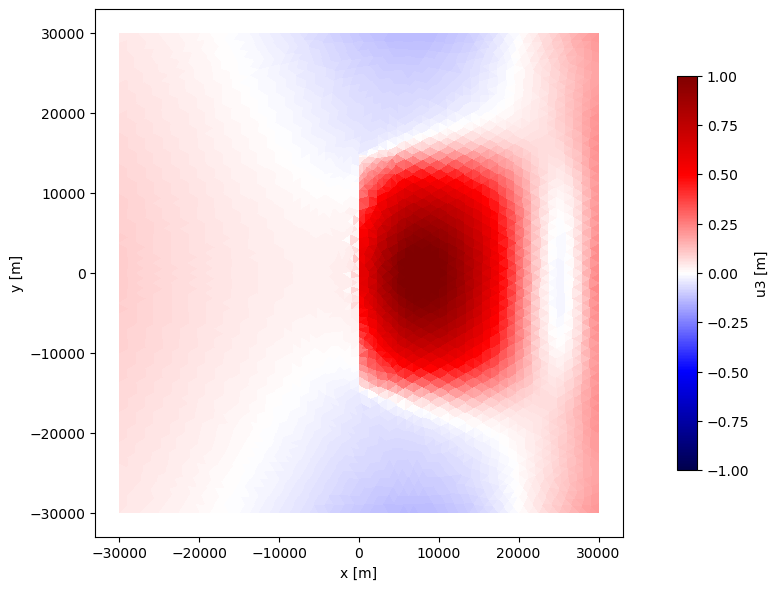

In [45]:
# Let's plot the vertical displacement on the seafloor (elastic side) first
plot_surface(xdmfFilename, timestep=180, var="u3", select_flag=0, vmin=-1, vmax=1)

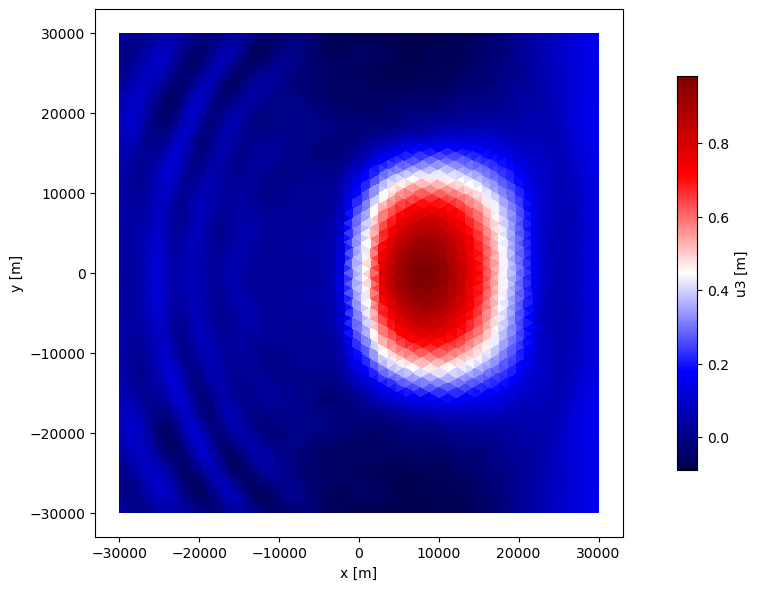

In [46]:
# Let's plot the ocean acoustic and tsunami waves
plot_surface(xdmfFilename, timestep=30, var="u3", select_flag=3)

#### Short tasks

- We ran the fully coupled simulation for 240 s and specified that the surface output should be given each second. This means we get 240 timesteps. (1) Try to find the corresponding lines in the SeisSol parameters file. (2) Visualize the tsunami at different times and change the colorbar limits to identify the ocean acoustic waves. You may also want to visualize the vertical sea surface velocity (_v3_) instead of _u3_.
- How does the acoustic side of the seafloor look like and how does it compare to the elastic side of the seafloor? Are there differences for TTPV1? What about TTPV2 (see next exercises)?

## Exercises (optional)

#### Task 1

Run a simulation for TTPV2. For this exercise, you must modify the parameter.par file and identify the line where the mesh file is specified. Use the mesh associated with TTPV2. I also recommend to change the output file name from "ttpv1" to "ttpv2" to avoid confusion later on.

#### Task 2

Change the numerical fluxes used and observe how the solution changes at the seafloor. Which combination of fluxes returns the "most realistic" results at the trench for TTPV2?

#### Task 3

Read the [benchmark description](https://doi.org/10.5281/zenodo.15389414) and place synthetic receivers on and off the fault. Compare results between TTPV1 and TTPV2.


#### Task 4 

Now that you are familiar with the output of the fully coupled earthquake-tsunami benchmark scenarios, we encourage you to look at different results on the CRESCENT Code Verification Platform (https://det.cascadiaquakes.org) and compare against these higher resolution benchmark results. We also invite you to create an account and upload your own benchmark results (https://det-uploader.cascadiaquakes.org) for comparison. Note: the upload will only work if all metadata according to the benchmark description have been properly added.